In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import matplotlib

In [2]:
def conv(x, h):
    ret = np.zeros(len(x))
    for i in range (len(x)):
        for k in range (i + 1):
            ret[i] += x[k] * h[i - k]
    return ret

# گسسته زمان
## Convolution
### الف)

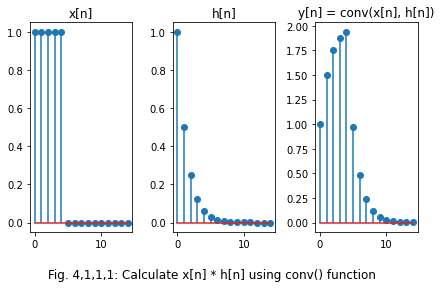

In [3]:
n = np.arange(0, 15)
x = np.concatenate((np.ones(5), np.zeros(10)))
h = [0.5 ** i for i in range(15)]
y = conv(x, h)

fig,axes = plt.subplots(nrows = 1,ncols = 3)

axes[0].set_title('x[n]')
axes[1].set_title('h[n]')
axes[2].set_title('y[n] = conv(x[n], h[n])')

axes[0].stem(n, x, use_line_collection = True)
axes[1].stem(n, h, use_line_collection = True)
axes[2].stem(n, y, use_line_collection = True)
fig.supxlabel('Fig. 4,1,1,1: Calculate x[n] * h[n] using conv() function')
plt.tight_layout()
plt.savefig('D_Figs/Fig. 4,1,1,1: Calculate x[n] * h[n] using conv() function.png', dpi=300, bbox_inches='tight')

### ب)
همان طور که مشاهده می‌کنید نمودار این بخش و بخش قبل شباهت زیادی به هم دارند ولی نمودار این بخش بازه ی بزرگتری را پوشش داده است.

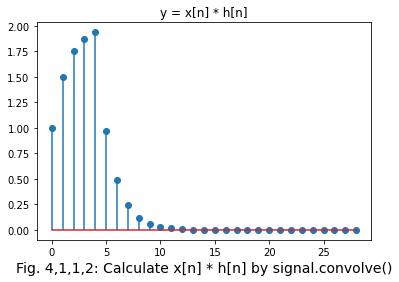

In [4]:
y = signal.convolve(x, h)
n = np.arange(len(y))
plt.stem(n, y, use_line_collection = True)
plt.title("y = x[n] * h[n]")
plt.xlabel("Fig. 4,1,1,2: Calculate x[n] * h[n] by signal.convolve()", fontsize= 14)
plt.savefig('D_Figs/Fig. 4,1,1,2: Calculate x[n] * h[n] by signal.convolve().png', dpi=300, bbox_inches='tight')

### ج)
$mode$
می‌تواند ۳ حالت داشته باشد که نشان دهنده‌ی سایز خروجی است.

$mode = 'full'$:

در اینجا خروجی سایز کامل کانولوشن دو ورودی خود را دارد. این حالت نیز حالت پیش فرض است.


$mode = 'valid'$:

در این حالت خروجی تنها شامل جملاتی است که وابسته به اضافه کردن صفر به ورودی نیست(در این حالت یکی از ورودی ها باید در تمام ابعاد از ورودی دیگر بزرگتر باشد)


$mode = 'same'$:

در این حالت سایز خروجی برابر با ورودی اول می‌شود.

## Deconvolution
### الف)

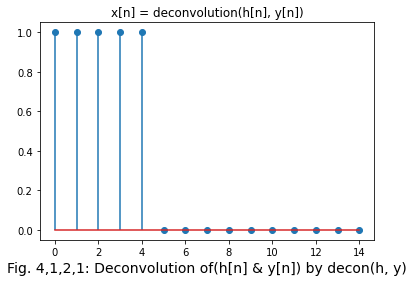

In [5]:
def decon(x, y):
    x_mat = np.zeros((len(x), len(x)))
    for i in range(len(x)):
        for j in range(len(x)):
            if j >= i:
                x_mat[i, j] = x[j - i]
    x_mat_inv = np.linalg.inv(x_mat)
    return np.dot(y, x_mat_inv)

y = signal.convolve(h, x)
y = y[0 : len(x)]
x_tmp = decon(h, y)
n = np.arange(len(x_tmp))

plt.stem(n, x_tmp, use_line_collection = True)
plt.title("x[n] = deconvolution(h[n], y[n])")
plt.xlabel("Fig. 4,1,2,1: Deconvolution of(h[n] & y[n]) by decon(h, y)", fontsize= 14)
plt.savefig('D_Figs/Fig. 4,1,2,1: Deconvolution of(h[n] & y[n]) by decon(h, y).png', dpi=300, bbox_inches='tight')

### ب)
خیر چون ممکن است به ازای دو سیگنال هیچ سیگنالی وجود نداشته باشد که اگر با اولی کانوالو شود سیگنال دومی را خروجی دهد. به عنوان مثال در این راه حل که از ماتریس استفاده شده است، اگر دترمینان ماتریس متناظر با سیگنال ورودی اول صفر باشد، این ماتریس معکوس نخواهد داشت در نتیجه ما جوابی نخواهیم داشت.

### ج)
نتایج یکسان است. البته در بخش قبلی قسمتی از سیگنال پاسخ را قطع کردیم تا سایز آن با سایز سیگنال ورودی یکی شود و در این حالت بود که سیگنال درستی را در خروجی می‌دیدیم ولی اگر داخل تابع
$convolve$
متغیر 
$mode$
را برابر 
$same$
قرار می‌دادیم تا پاسخ سیستم هم اندازه سیگنال ورودی شود، جواب دیگری به دست می‌آمد، ولی در اینجا تفاوت اندازه سیگنال ورودی و پاسخ سیستم برای ما اهمیت ندارد 

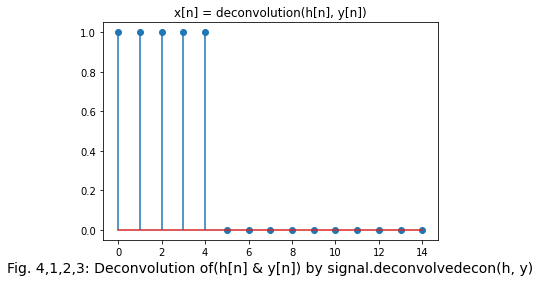

In [6]:
y = signal.convolve(h, x)
x_tmp = signal.deconvolve(y, h)[0]
n = np.arange(len(x_tmp))

plt.stem(n, x_tmp, use_line_collection = True)
plt.title("x[n] = deconvolution(h[n], y[n])")
plt.xlabel("Fig. 4,1,2,3: Deconvolution of(h[n] & y[n]) by signal.deconvolvedecon(h, y)", fontsize= 14)
plt.savefig('D_Figs/Fig. 4,1,2,3: Deconvolution of(h[n] & y[n]) by signal.deconvolvedecon(h, y).png', dpi=300, bbox_inches='tight')

# پیوسته زمان
## 1)
### الف)
خیر تفاوتی ندارند

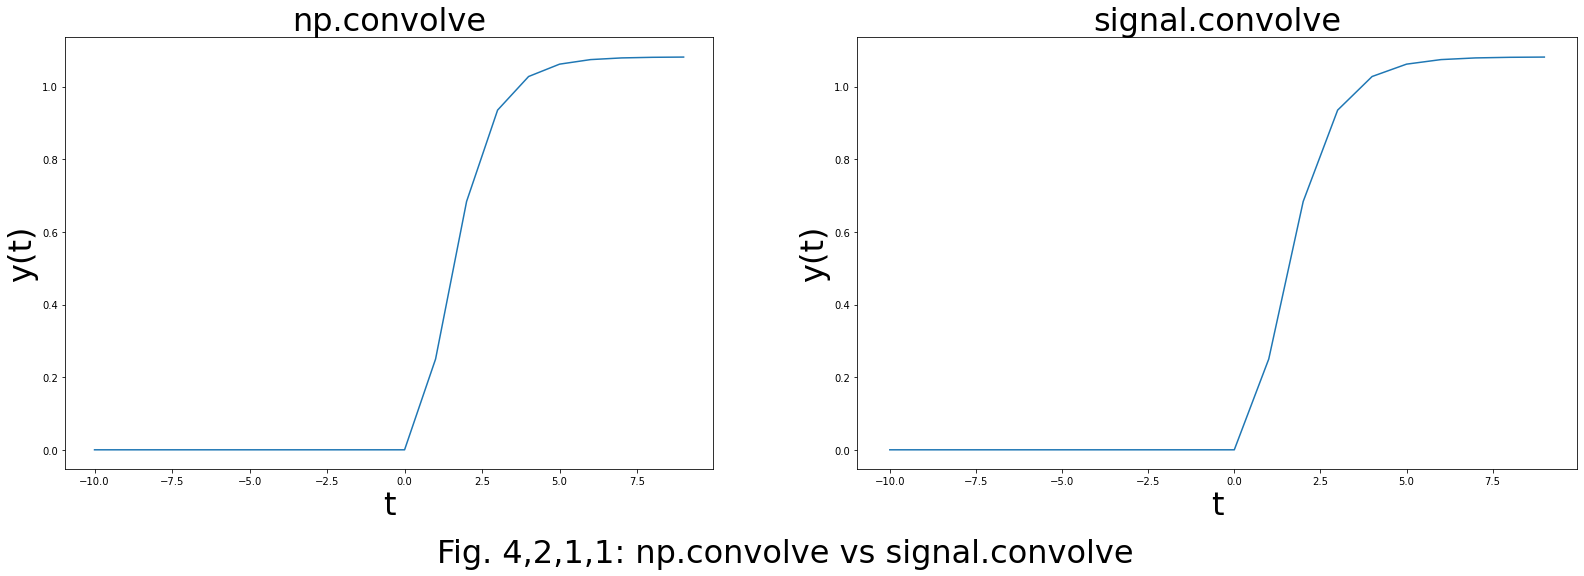

In [7]:
def step(t):
    if t > 0:
        return 1
    elif -0.01 <= t <= 0.01:
        return 50 * (t + 0.01)
    else:
        return 0

def x_func(t, alpha = 1):
    return np.exp(-(alpha * t)) * step(t)

start = -10
finish = 10
leng = finish - start

t = np.arange(start, finish)
x = [x_func(i, 1) for i in t]
h = [step(i) for i in t]
y1 = np.convolve(x, h, mode = 'same')
y2 = signal.convolve(h, x, mode = 'same')

fig = plt.figure(figsize = (20, 6))
axes1 = fig.add_axes([0, .24, 0.45, 1]);
axes2 = fig.add_axes([0.55, .24, 0.5, 1]);
axes1.plot(t, y1)
axes2.plot(t, y2)


fig.supxlabel("Fig. 4,2,1,1: np.convolve vs signal.convolve", fontsize = 32)
axes1.set_xlabel('t', fontsize = 32)
axes2.set_xlabel('t', fontsize = 32)
axes1.set_ylabel('y(t)', fontsize = 32)
axes2.set_ylabel('y(t)', fontsize = 32)
axes1.set_title('np.convolve', fontsize = 32)
axes2.set_title('signal.convolve', fontsize = 32)
plt.savefig('D_Figs/Fig. 4,2,1,1: np.convolve vs signal.convolve.png', dpi=300, bbox_inches='tight')

### ب)
حل تحلیلی سیستم داخل فایل
$Hand Writings$
می‌باشد.

### ج)
بلی، یکسان است.

## ۲)
### الف)
پاسخ این بخش در فایل 
$Hand Writings$
موجود است.

### ب)
شکل ظاهری نمودار درست است ولی یک ضریب ۱۰ خورده است.

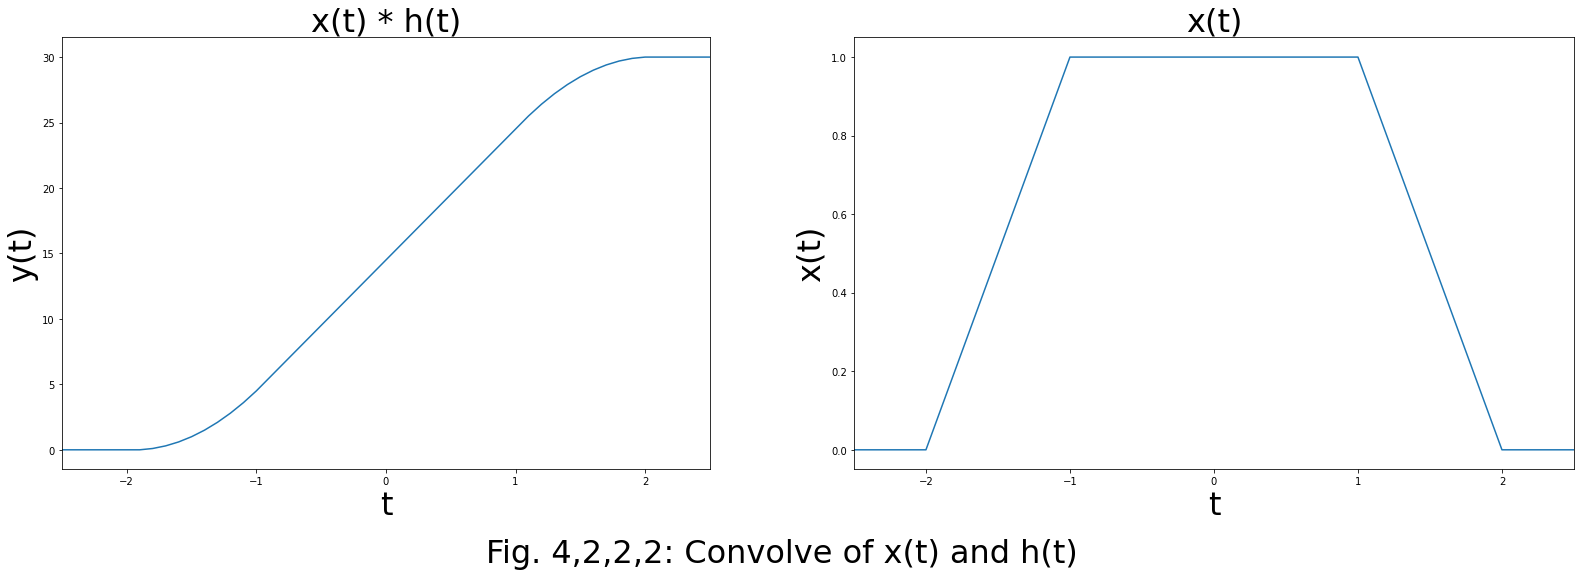

In [8]:
t = np.arange(-20, 20, 0.1)
h = [step(i) for i in t]
x = np.piecewise(t, [(t > 2) * (t < -2), ((t < 1) * (t > -1)) + (t == 1) + (t == -1), (t == 2) + ((t < 2) * (t > 1)), (t == -2) + ((t > -2) * (t < -1))], [0, 1, lambda t: 2 - t, lambda t: 2 + t])
y = np.convolve(h, x, mode = 'same')


fig = plt.figure(figsize = (20, 6))
axes1 = fig.add_axes([0, .24, 0.45, 1]);
axes2 = fig.add_axes([0.55, .24, 0.5, 1]);
axes1.plot(t, y)
axes2.plot(t, x)

axes1.set_xlim(-2.5, 2.5)
axes2.set_xlim(-2.5, 2.5)

fig.supxlabel("Fig. 4,2,2,2: Convolve of x(t) and h(t)", fontsize = 32)
axes1.set_xlabel('t', fontsize = 32)
axes2.set_xlabel('t', fontsize = 32)
axes1.set_ylabel('y(t)', fontsize = 32)
axes2.set_ylabel('x(t)', fontsize = 32)
axes1.set_title('x(t) * h(t)', fontsize = 32)
axes2.set_title('x(t)', fontsize = 32)
plt.savefig('D_Figs/Fig. 4,2,2,2: Convolve of x(t) and h(t).png', dpi=300, bbox_inches='tight')

## 3)
### الف)

In [9]:
def train(n, T):
    pulse = np.linspace(0, n - 1, n//T)
    pulse = [int(i) for i in pulse]
    return signal.unit_impulse(n, pulse)

### ب)
در صورتی که 
 $T$
 بزرگتر مساوی دوره تناوب 
 $x(t)$
 که در اینجا برابر ۴ است باشد، می‌توان سیگنال اولیه را بازیابی کرد.

### ج)
ما به ازای هر ضربه یک مثلث روی جواب سیستم داریم حال با افزایش دوره تناوب فاصله میان ضربه ها بیشتر می‌شوند در نتیجه همان طور که در شکل می‌بینید فاصله‌ی میان مثلث ها در خروجی سیستم بیشتر می‌شود و در صورت کاهش دوره تناوب قطار ضربه این مثلث ها به هم نزدیک شده تا جایی که همپوشانی پیدا می‌کنند به عنوان مثال وقتی دوره تناوب برابر دو است مثلث های پاسخ سیستم به صورت نصفه روی هم می‌افتند در نتیجه هنگامی که در سراشیبی یک مثلث قرار داریم در سربالایی مثلث دیگر قرار داریم پس پاسخ سیستم یک عدد ثابت است. 

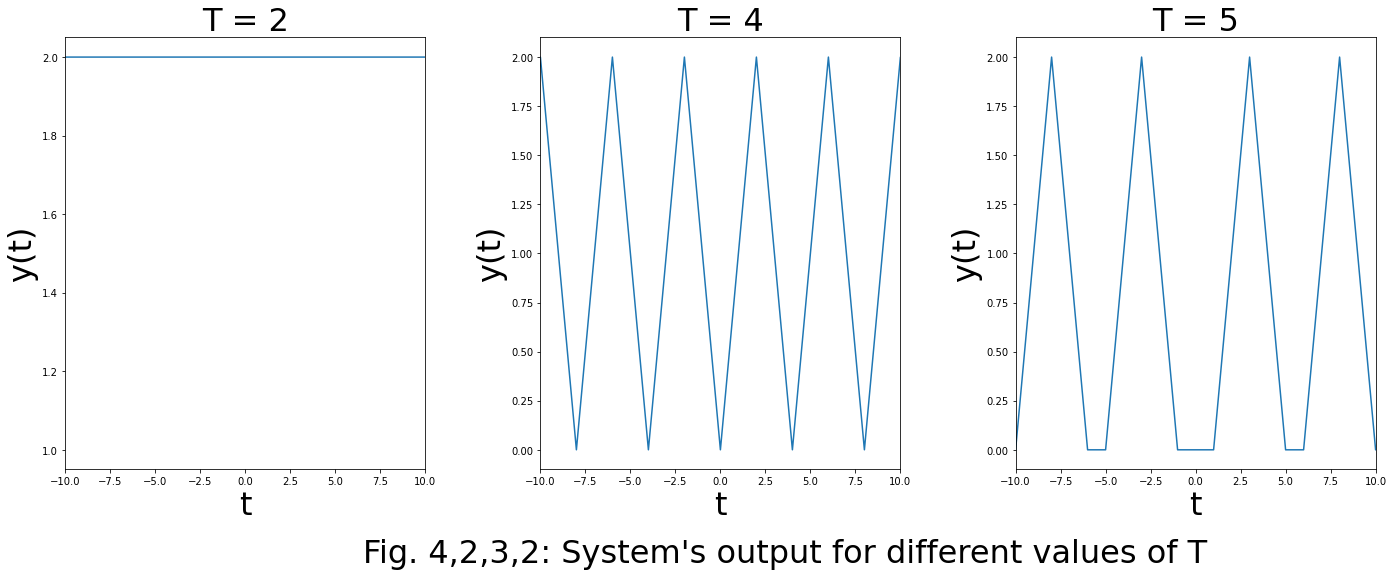

In [10]:
def x_func(t):
    if abs(t) > 2:
        return 0
    else:
        return 1 - abs(t)/2

t = np.arange(-40, 40, 1)
    
x = np.piecewise(t, [(abs(t) > 2) + (abs(t) == 2), abs(t) < 2], [0, lambda t : 2 - abs(t)])
fig = plt.figure(figsize = (20, 6))

h1 = train(80, 2)
h2 = train(80, 4)
h3 = train(80, 5)

y1 = np.convolve(x, h1, mode = 'same')
y2 = np.convolve(x, h2, mode = 'same')
y3 = np.convolve(x, h3, mode = 'same')

axes1 = fig.add_axes([0, .24, 0.25, 1]);
axes2 = fig.add_axes([0.33, .24, 0.25, 1]);
axes3 = fig.add_axes([0.66, .24, 0.25, 1]);

axes1.plot(t, y1)
axes2.plot(t, y2)
axes3.plot(t, y3)

axes1.set_xlim((-10, 10))
axes2.set_xlim((-10, 10))
axes3.set_xlim((-10, 10))

fig.supxlabel("Fig. 4,2,3,2: System's output for different values of T", fontsize = 32)
axes1.set_xlabel('t', fontsize = 32)
axes2.set_xlabel('t', fontsize = 32)
axes3.set_xlabel('t', fontsize = 32)
axes1.set_ylabel('y(t)', fontsize = 32)
axes2.set_ylabel('y(t)', fontsize = 32)
axes3.set_ylabel('y(t)', fontsize = 32)
axes1.set_title('T = 2', fontsize = 32)
axes2.set_title('T = 4', fontsize = 32)
axes3.set_title('T = 5', fontsize = 32)
plt.savefig('D_Figs/Fig. 4,2,3,2: System\'s output for different values of T.png', dpi=300, bbox_inches='tight')